# Clustering on car MPG data set

In the Auto MPG dataset, the "origin" column indicates the country of manufacture for a car, with values typically coded as
* 1 for USA,
* 2 for Europe, and
* 3 for Japan; essentially signifying the car's place of origin

In [ ]:
# Numerical libraries
import numpy as np

from sklearn.model_selection import train_test_split

# Import Linear Regression machine learning library
from sklearn.cluster import KMeans

# to handle data in form of rows and columns
import pandas as pd

# importing ploting libraries
import matplotlib.pyplot as plt

#importing seaborn for statistical plots
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reading the CSV file into pandas dataframe
mpg_df = pd.read_csv("/content/drive/MyDrive/0.Latest_DS_Course/USL/Kmeans/Notebooks/car-mpg.csv")

In [ ]:
# Check top few records to get a feel of the data structure
mpg_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [ ]:
# Check top few records to get a feel of the data structure
mpg_df.tail()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
393,27.0,4,140.0,86,2790,15.6,82,1,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,1,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,1,chevy s-10


In [ ]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
 9   car_name  398 non-null    object 
dtypes: float64(3), int64(5), object(2)
memory usage: 31.2+ KB


In [ ]:
mpg_df.describe().transpose()     # horsepower is missing

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0


### hp contains string values that need to be cleaned

In [ ]:
temp = pd.DataFrame(mpg_df.hp.str.isdigit())

temp[temp['hp'] == False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [ ]:
data = {

        "Name": ["John","Joe", "Smith"],
        "Marks": [99,89,"?"]
}

In [ ]:
marks_df = pd.DataFrame(data)

In [ ]:
marks_df.Marks.str.isdigit()


,Marks
0,NaN
1,NaN
2,False


In [ ]:
marks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    3 non-null      object
 1   Marks   3 non-null      object
dtypes: object(2)
memory usage: 180.0+ bytes


In [ ]:
mpg_df = mpg_df.replace('?', np.nan)

In [ ]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        392 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
 9   car_name  398 non-null    object 
dtypes: float64(3), int64(5), object(2)
memory usage: 31.2+ KB


In [ ]:
mpg_df['hp'] = mpg_df['hp'].astype('float64')

In [ ]:
mpg_df.isnull().sum()

,0
mpg,0
cyl,0
disp,0
hp,6
wt,0
acc,0
yr,0
origin,0
car_type,0
car_name,0


##Handle missing values

In [ ]:
numeric_cols = mpg_df.drop('car_name', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
car_names = pd.DataFrame(mpg_df[['car_name']])


numeric_cols = numeric_cols.apply(lambda x: x.fillna(x.median()),axis=0)
mpg_df = numeric_cols.join(car_names)   # Recreating mpg_df by combining numerical columns with car names

mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    float64
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
 9   car_name  398 non-null    object 
dtypes: float64(4), int64(5), object(1)
memory usage: 31.2+ KB


In [ ]:
mpg_df.isnull().sum()

,0
mpg,0
cyl,0
disp,0
hp,0
wt,0
acc,0
yr,0
origin,0
car_type,0
car_name,0


In [ ]:
mpg_df["origin"].value_counts(normalize=True)*100

,proportion
origin,
1,62.562814
3,19.849246
2,17.587940


In [ ]:
mpg_df.iloc[:,0:]

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,ford torino
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,1,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,1,ford ranger


##  Let us do a pair plot analysis to visually check number of likely clusters

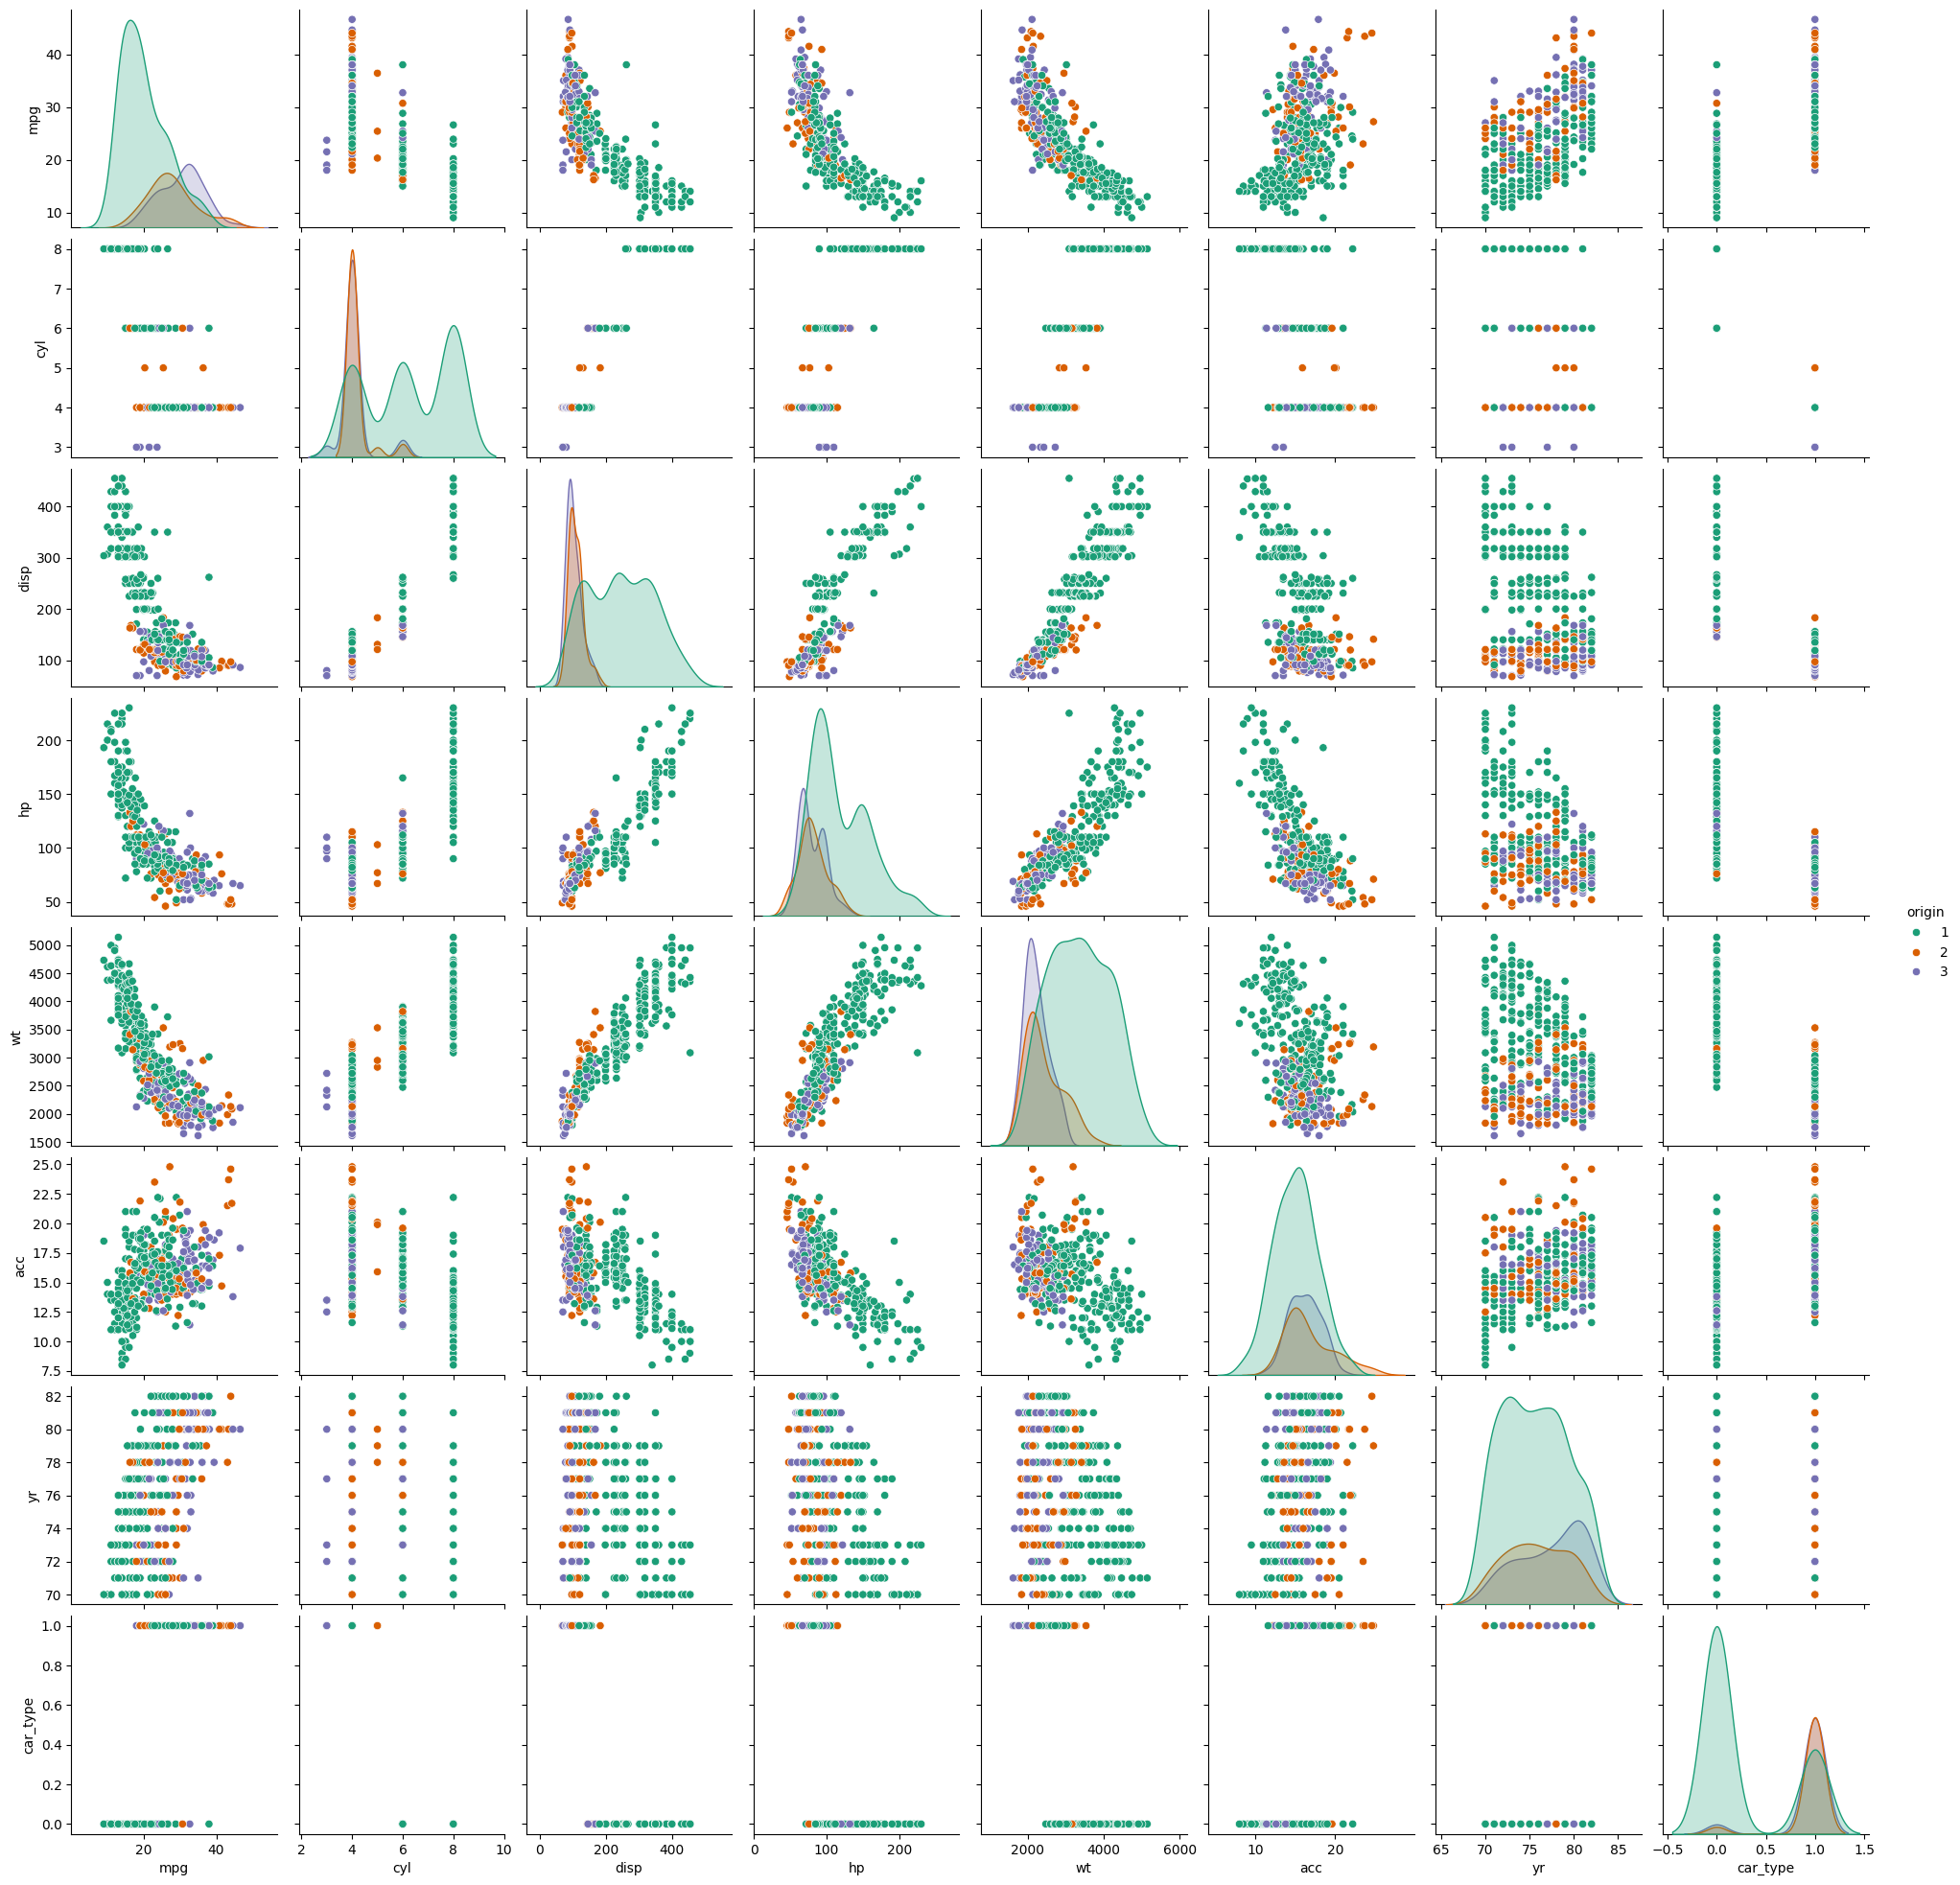

In [ ]:
# This is done using scatter matrix function which creates a dashboard reflecting useful information about the dimensions
# The result can be stored as a .png file and opened in say, paint to get a larger view

mpg_df_attr = mpg_df.iloc[:, 0:9]
# mpg_df_attr['dispercyl'] = mpg_df_attr['disp'] / mpg_df_attr['cyl']
sns.pairplot(mpg_df_attr, diag_kind='kde', hue = 'origin',palette='Dark2')   # to plot density curve instead of histogram

#sns.pairplot(mpg_df_attr)  # to plot histogram, the default

In [ ]:
mpg_df[mpg_df['wt']>4000], mpg_df.shape

(      mpg  cyl   disp     hp    wt   acc  yr  origin  car_type  \
 5    15.0    8  429.0  198.0  4341  10.0  70       1         0   
 6    14.0    8  454.0  220.0  4354   9.0  70       1         0   
 7    14.0    8  440.0  215.0  4312   8.5  70       1         0   
 8    14.0    8  455.0  225.0  4425  10.0  70       1         0   
 25   10.0    8  360.0  215.0  4615  14.0  70       1         0   
 ..    ...  ...    ...    ...   ...   ...  ..     ...       ...   
 231  15.5    8  400.0  190.0  4325  12.2  77       1         0   
 232  16.0    8  351.0  149.0  4335  14.5  77       1         0   
 265  17.5    8  318.0  140.0  4080  13.7  78       1         0   
 289  16.9    8  350.0  155.0  4360  14.9  79       1         0   
 290  15.5    8  351.0  142.0  4054  14.3  79       1         0   
 
                      car_name  
 5            ford galaxie 500  
 6            chevrolet impala  
 7           plymouth fury iii  
 8            pontiac catalina  
 25                  ford f25

In [ ]:
from scipy.stats import zscore

mpg_df_attr = mpg_df.loc[:, 'mpg':'origin']
mpg_df_attr_z = mpg_df_attr.apply(zscore)


mpg_df_attr_z.pop('origin')      # Remove "origin" and "yr" columns
mpg_df_attr_z.pop('yr')

array = mpg_df_attr_z.values


In [ ]:
mpg_df_attr.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


<Axes: xlabel='disp'>

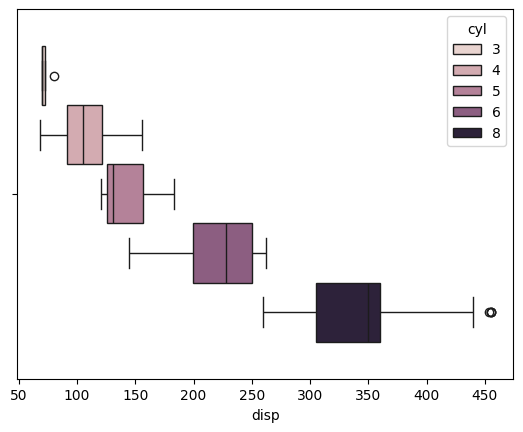

In [ ]:
import seaborn as sns
sns.boxplot(data =mpg_df_attr, x="disp", hue="cyl" )

In [ ]:
mpg_df_attr_z.head()

,mpg,cyl,disp,hp,wt,acc
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117


<Axes: xlabel='disp'>

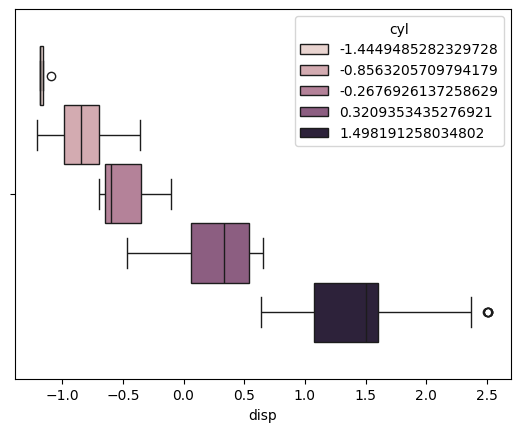

In [ ]:
sns.boxplot(data =mpg_df_attr_z, x="disp", hue="cyl" )

# KMeans Clustering

In [ ]:
cluster_range = range( 1, 8)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5) # runs 5 times , returns the best model with least intertia
  clusters.fit(mpg_df_attr)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,2.896353e+08
1,2,7.428960e+07
2,3,3.420817e+07
3,4,1.905669e+07
4,5,1.376912e+07
5,6,1.033486e+07
6,7,7.776709e+06


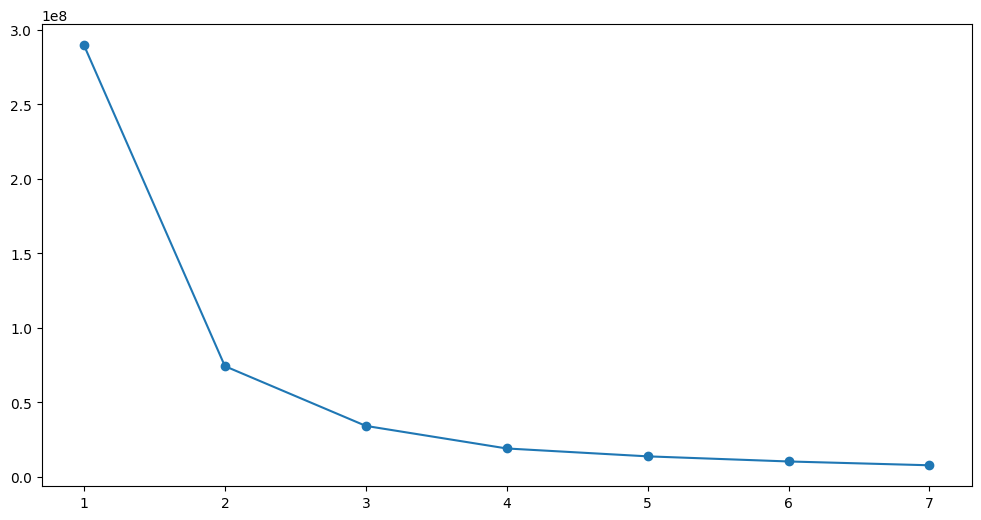

In [ ]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [ ]:
# The elbow plot confirms our visual analysis that there are likely 3 or 4 good clusters
# Let us start with 3 clusters

In [ ]:
cluster = KMeans( n_clusters = 3, random_state = 2354 )
cluster.fit(mpg_df_attr_z)
mpg_df_attr_z_copy = mpg_df_attr_z.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly

In [ ]:
mpg_df_attr_z_copy

,mpg,cyl,disp,hp,wt,acc
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117
...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,-0.479482,-0.213324,0.011586
394,2.624265,-0.856321,-0.925936,-1.370127,-0.993671,3.279296
395,1.087017,-0.856321,-0.561039,-0.531873,-0.798585,-1.440730
396,0.574601,-0.856321,-0.705077,-0.662850,-0.408411,1.100822


In [ ]:
cluster.labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 2, 1, 1,
       1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 1, 1, 1,
       1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0,
       0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 2, 2, 1, 2,

In [ ]:
centroids = cluster.cluster_centers_
centroids

array([[-1.15110476,  1.4860546 ,  1.48450715,  1.50624078,  1.38753374,
        -1.06267868],
       [ 0.75394661, -0.85347696, -0.80321374, -0.67506194, -0.78549879,
         0.36133415],
       [-0.47244453,  0.34598334,  0.23689416, -0.06773972,  0.29795187,
         0.30089004]])

In [ ]:
centroid_df = pd.DataFrame(centroids, columns = list(mpg_df_attr_z) )
centroid_df

,mpg,cyl,disp,hp,wt,acc
0,-1.151105,1.486055,1.484507,1.506241,1.387534,-1.062679
1,0.753947,-0.853477,-0.803214,-0.675062,-0.785499,0.361334
2,-0.472445,0.345983,0.236894,-0.067740,0.297952,0.300890


In [ ]:
prediction=cluster.predict(mpg_df_attr_z)
mpg_df_attr_z["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

In [ ]:
mpg_df_attr["GROUP"] = prediction

In [ ]:
mpg_df_attr_z.head()

,mpg,cyl,disp,hp,wt,acc,GROUP
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,0
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,0
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,0
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,0
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,0


In [ ]:
mpg_df_attr_z.GROUP.unique()

array([0, 1, 2], dtype=int32)

# Instead of interpreting the neumerical values of the centroids, let us do a visual analysis by converting the
# centroids and the data in the cluster into box plots.

In [ ]:
mpg_df_attr_z.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'GROUP'], dtype='object')

<Axes: xlabel='mpg'>

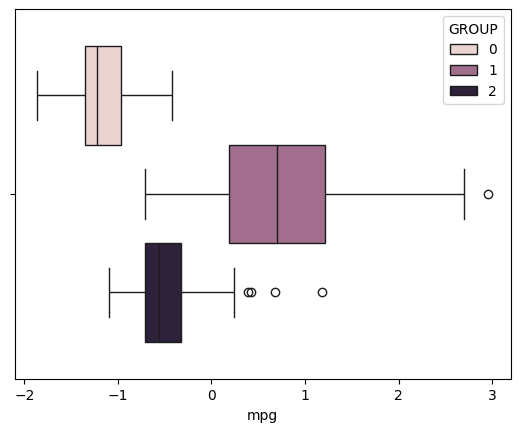

In [ ]:
sns.boxplot(data= mpg_df_attr_z, x="mpg", hue="GROUP")

In [ ]:
mpg_df_attr[mpg_df_attr['GROUP']==0].to_csv("zero.csv")

In [ ]:
mpg_df_attr[mpg_df_attr['GROUP']==1].to_csv("one.csv")

In [ ]:
mpg_df_attr[mpg_df_attr['GROUP']==2].to_csv("two.csv")

<Axes: xlabel='disp'>

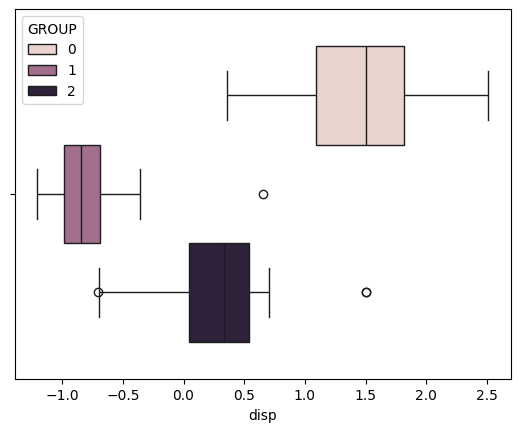

In [ ]:
sns.boxplot(data= mpg_df_attr_z, x="disp", hue="GROUP")

<Axes: xlabel='hp'>

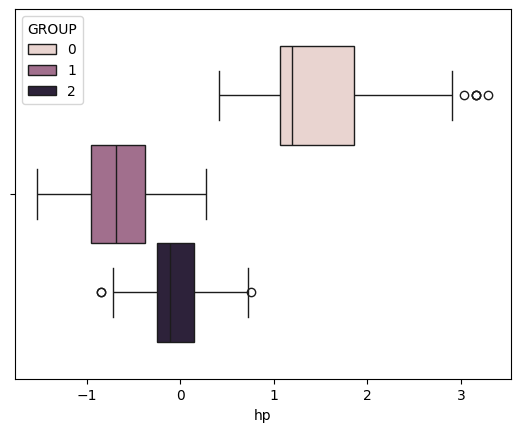

In [ ]:
sns.boxplot(data= mpg_df_attr_z, x="hp", hue="GROUP")